# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
print(df.shape)

(1599, 12)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [5]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

# Checking the amount of each wine quality

In [6]:
print(df["quality"].value_counts().sort_index())

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [7]:
#Create binary target
df['label'] = (df['quality'] >= 7).astype(int)

#Check
print(df['label'].value_counts())

label
0    1382
1     217
Name: count, dtype: int64


# Training the model

In [8]:
X = df.drop(['quality', 'label'], axis=1)
y = df['label']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline using linear SVM Baseline

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

#Pipeline linear SVM Baseline

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])

#train
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(kernel='linear'))])

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

#predict
y_pred = svm_pipeline.predict(X_test)

#evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320

[[273   0]
 [ 47   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Pipeline using linear SVM with weight

In [12]:
# Pipeline for linear kernel with weight

svm_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', class_weight='balanced'))
])

#train
svm_linear.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(class_weight='balanced', kernel='linear'))])

In [13]:
#Predict

y_pred_linear = svm_linear.predict(X_test)

#Evaluate
print(classification_report(y_test, y_pred_linear))
print(confusion_matrix(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87       273
           1       0.42      0.89      0.57        47

    accuracy                           0.80       320
   macro avg       0.70      0.84      0.72       320
weighted avg       0.90      0.80      0.83       320

[[215  58]
 [  5  42]]


# Pipeline using RBF kernel with weight

In [14]:
#Pipeline for RBF Kernel

svm_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', class_weight='balanced'))
])

#train
svm_rbf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(class_weight='balanced'))])

In [15]:
#predict

y_pred_rbf = svm_rbf.predict(X_test)

#Evaluate
print(classification_report(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))


              precision    recall  f1-score   support

           0       0.99      0.82      0.90       273
           1       0.48      0.94      0.63        47

    accuracy                           0.84       320
   macro avg       0.73      0.88      0.77       320
weighted avg       0.91      0.84      0.86       320

[[225  48]
 [  3  44]]


#Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.01, 0.1, 1, 'scale']
}

# Grid search
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-val score (F1):", grid_search.best_score_)

Best parameters: {'svm__C': 100, 'svm__gamma': 0.1}
Best cross-val score (F1): 0.549669184129348


#Result after tuning

In [18]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       273
           1       0.67      0.68      0.67        47

    accuracy                           0.90       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.90      0.90      0.90       320

[[257  16]
 [ 15  32]]


# Confusion Matrix Visualization

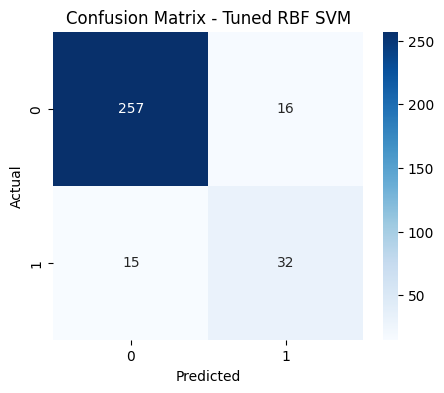

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = [0]*273 + [1]*47
y_pred = [0]*257 + [1]*16 + [0]*15 + [1]*32

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned RBF SVM")
plt.show()
